In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.0 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
df = pd.read_csv('/content/Full_Features_24_02_ammended_blanksremoved_1.csv', engine='python', encoding='utf-8', error_bad_lines=False)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,1,artist_x,4,id,energy_x,key_x,loudness_x,mode_x,speechiness_x,...,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation,Overall_Emotion
0,0.0,Please Don't Go,KC And The Sunshine Band,05/01/1980,6dw6BquK0Mv72p6HpusqKN,0.615,6.0,-11.093,1.0,0.0398,...,0.0,0.086957,0.086957,0.304348,0.108696,0.108696,0.000000,0.282609,0.021739,joy
1,1.0,Escape (The Pina Colada Song),Rupert Holmes,05/01/1980,5IMtdHjJ1OtkxbGe4zfUxQ,0.509,0.0,-13.668,1.0,0.0548,...,0.0,0.116279,0.093023,0.209302,0.151163,0.046512,0.011628,0.139535,0.151163,anticipation
2,2.0,Rock With You,Michael Jackson,05/01/1980,7oOOI85fVQvVnK5ynNMdW7,0.535,1.0,-12.521,1.0,0.0353,...,0.0,0.066667,0.000000,0.366667,0.144444,0.133333,0.000000,0.111111,0.022222,fear
3,3.0,Send One Your Love,Stevie Wonder,05/01/1980,3GcHkmz4horYIEPYvdB0xF,0.358,0.0,-17.456,0.0,0.0814,...,0.0,0.120000,0.040000,0.320000,0.080000,0.040000,0.000000,0.260000,0.100000,joy
4,4.0,Do That To Me One More Time,Captain & Tennille,05/01/1980,0m4jVVZrsv0bLkAr1uM6UG,0.524,7.0,-8.227,1.0,0.0255,...,0.0,0.030303,0.060606,0.242424,0.000000,0.000000,0.000000,0.212121,0.454545,anticipation


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9691 entries, 0 to 9690
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          9690 non-null   float64
 1   1                   9690 non-null   object 
 2   artist_x            9690 non-null   object 
 3   4                   9690 non-null   object 
 4   id                  9690 non-null   object 
 5   energy_x            9690 non-null   float64
 6   key_x               9690 non-null   float64
 7   loudness_x          9690 non-null   float64
 8   mode_x              9690 non-null   float64
 9   speechiness_x       9690 non-null   float64
 10  acousticness_x      9690 non-null   float64
 11  instrumentalness_x  9690 non-null   float64
 12  liveness_x          9690 non-null   float64
 13  valence_x           9690 non-null   float64
 14  tempo_x             9690 non-null   float64
 15  duration_ms_x       9690 non-null   float64
 16  YEAR  

In [ ]:
df = df.dropna()
df.shape

(9689, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9689 entries, 0 to 9690
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          9689 non-null   float64
 1   1                   9689 non-null   object 
 2   artist_x            9689 non-null   object 
 3   4                   9689 non-null   object 
 4   id                  9689 non-null   object 
 5   energy_x            9689 non-null   float64
 6   key_x               9689 non-null   float64
 7   loudness_x          9689 non-null   float64
 8   mode_x              9689 non-null   float64
 9   speechiness_x       9689 non-null   float64
 10  acousticness_x      9689 non-null   float64
 11  instrumentalness_x  9689 non-null   float64
 12  liveness_x          9689 non-null   float64
 13  valence_x           9689 non-null   float64
 14  tempo_x             9689 non-null   float64
 15  duration_ms_x       9689 non-null   float64
 16  YEAR  

In [ ]:
df = df[(df != 123456).all(1)]
df.shape

(9688, 35)

In [ ]:
audio_features = ['artist_y', '1','YEAR', 'energy_x', 'loudness_x', 'speechiness_x', 'acousticness_x', 'instrumentalness_x', 'liveness_x', 'valence_x', 'tempo_x', 'danceability_y']
audio_df = df[audio_features]
audio_df.head()

,YEAR,energy_x,loudness_x,speechiness_x,acousticness_x,instrumentalness_x,liveness_x,valence_x,tempo_x,danceability_y
0,1980.0,0.615,-11.093,0.0398,0.00888,0.000002,0.0431,0.437,96.307,0.482
1,1980.0,0.509,-13.668,0.0548,0.46700,0.000004,0.0436,0.949,138.714,0.836
2,1980.0,0.535,-12.521,0.0353,0.17900,0.000099,0.1580,0.848,114.031,0.808
3,1980.0,0.358,-17.456,0.0814,0.71500,0.000013,0.0862,0.418,72.841,0.624
4,1980.0,0.524,-8.227,0.0255,0.56300,0.000131,0.0913,0.510,90.262,0.728


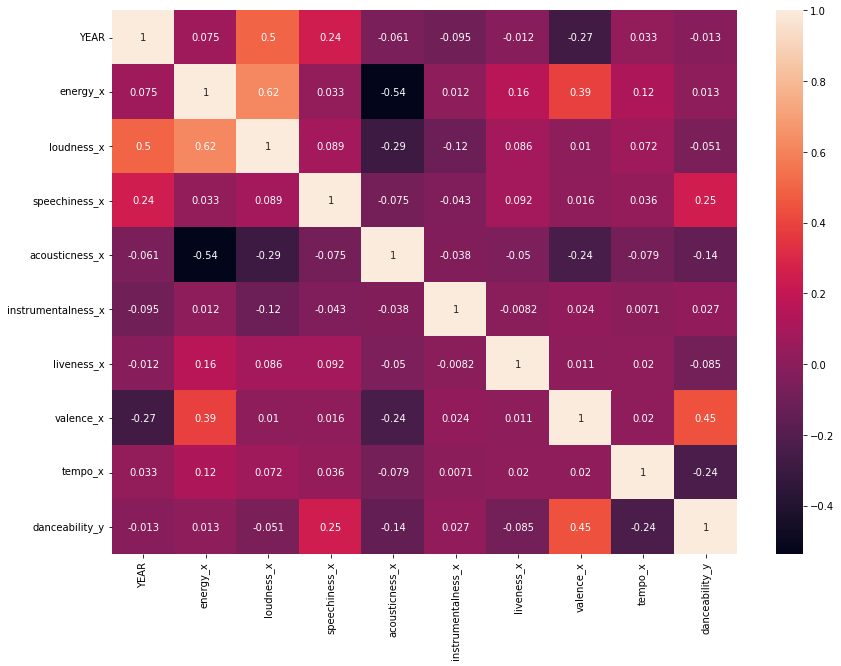

In [ ]:
#Feature analysis
correlation_matrix = audio_df.corr()
ax = plt.subplots(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True) #annot: if True, write the data value in each cell.
plt.show()

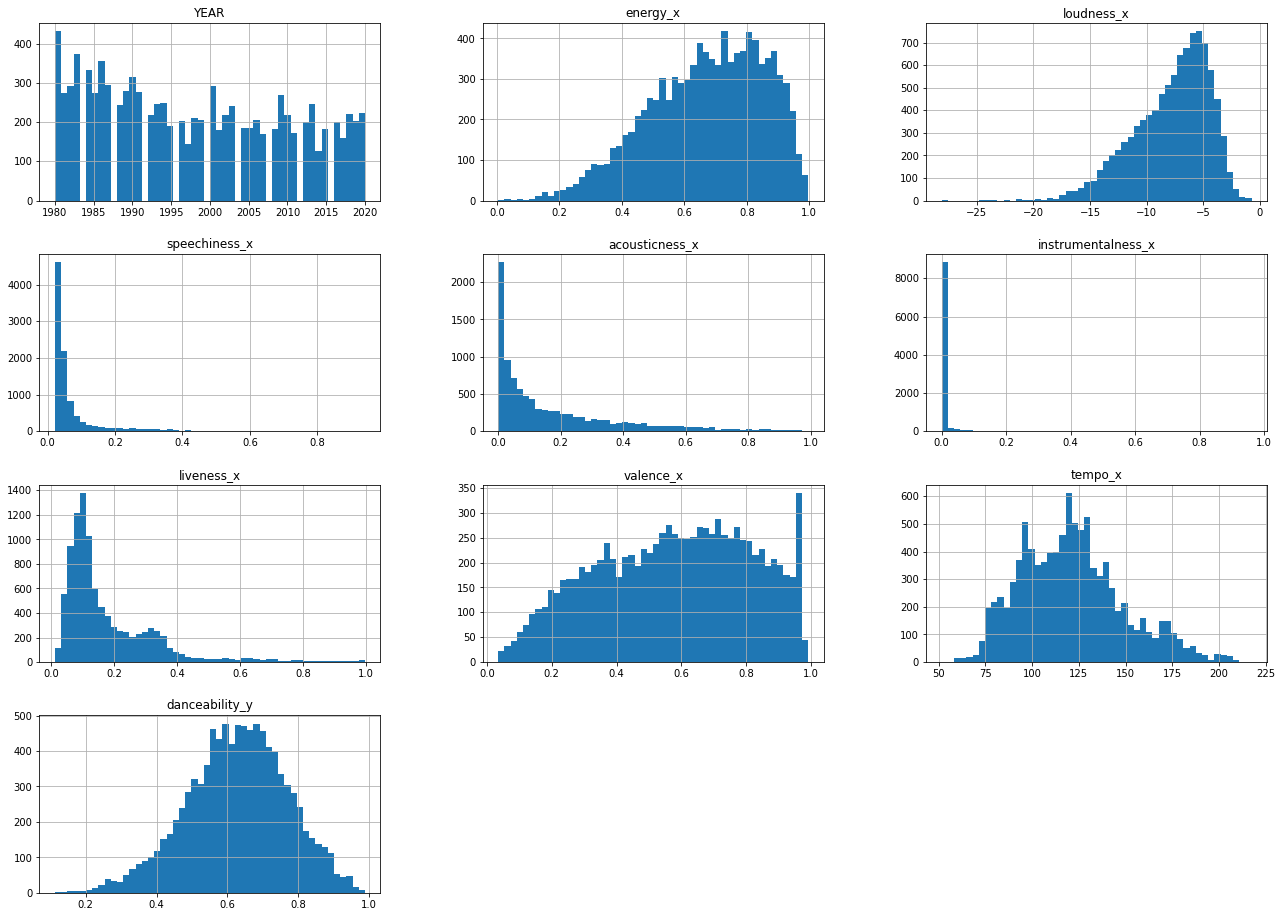

In [ ]:
#checking distribution of audio features
audio_df.hist(bins=50, figsize=(22,16))
plt.show()

In [ ]:
audio_df.loc[:,].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


YEAR                  1997.788088
energy_x                 0.671678
loudness_x              -7.794839
speechiness_x            0.072181
acousticness_x           0.179349
instrumentalness_x       0.019366
liveness_x               0.180458
valence_x                0.576532
tempo_x                121.246810
danceability_y           0.627207
dtype: float64

In [ ]:
audio_df.head()

,artist_y,1,YEAR,energy_x,loudness_x,speechiness_x,acousticness_x,instrumentalness_x,liveness_x,valence_x,tempo_x,danceability_y
0,Please Don't Go,Please Don't Go,1980.0,0.615,-11.093,0.0398,0.00888,0.000002,0.0431,0.437,96.307,0.482
1,Escape (The Pina Colada Song),Escape (The Pina Colada Song),1980.0,0.509,-13.668,0.0548,0.46700,0.000004,0.0436,0.949,138.714,0.836
2,Rock With You,Rock With You,1980.0,0.535,-12.521,0.0353,0.17900,0.000099,0.1580,0.848,114.031,0.808
3,Send One Your Love,Send One Your Love,1980.0,0.358,-17.456,0.0814,0.71500,0.000013,0.0862,0.418,72.841,0.624
4,Do That To Me One More Time,Do That To Me One More Time,1980.0,0.524,-8.227,0.0255,0.56300,0.000131,0.0913,0.510,90.262,0.728


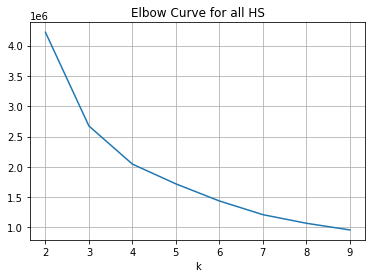

In [ ]:
#Using elbow method to calculate the best value of 'k' 
X = audio_df.iloc[:, [2,3,4,5,6,7,8,9,10]].values
sse = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    sse.append(model.inertia_)

plt.plot(range(2,10), sse)
plt.grid(True)
plt.xlabel('k')
plt.title('Elbow Curve for all HS')
plt.show()

In [ ]:
#Training data
X = audio_df.iloc[:, [2,3,4,5,6,7,8,9,10]].values
model = KMeans(n_clusters=4)
model.fit(X)

y = model.predict(X) #Each song goes to the cluster which has the most similarities in their features
y

array([2, 0, 0, ..., 3, 3, 2], dtype=int32)

In [ ]:
centers = model.cluster_centers_
centers

array([[ 1.98686702e+03,  6.78330136e-01, -9.34501621e+00,
         4.69490241e-02,  1.74054793e-01,  3.43254377e-02,
         1.83698114e-01,  6.59376877e-01,  1.22835990e+02],
       [ 1.99977705e+03,  6.98128322e-01, -7.31705084e+00,
         9.59849673e-02,  1.63438116e-01,  1.51257508e-02,
         1.84872549e-01,  5.68460421e-01,  1.69995107e+02],
       [ 1.99974097e+03,  6.43821211e-01, -7.71397167e+00,
         8.47021482e-02,  1.98381806e-01,  1.25616860e-02,
         1.76243649e-01,  5.48707005e-01,  9.23833272e+01],
       [ 2.00935019e+03,  6.87546435e-01, -5.97955877e+00,
         7.37626686e-02,  1.68164050e-01,  1.09225059e-02,
         1.79332081e-01,  5.04298892e-01,  1.31255966e+02]])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


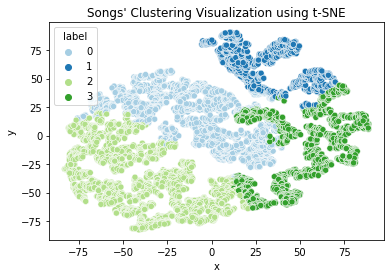

In [ ]:
#Since we are working with 8 features, we are going to apply dimensionality reduction techniques in order 
#to visualize our data in 2d. We are going to test PCA and t-SNE algorithms
#t-SNE seeks to preserve small pairwise distances 

from sklearn.manifold import TSNE

tsne = TSNE()
tsne_fit = tsne.fit_transform(X)

tsne_df = pd.DataFrame(tsne_fit, columns=['x', 'y'])
tsne_df['label'] = y

sns.scatterplot(data=tsne_df, x='x', y='y', hue='label', palette = 'Paired')
plt.title("Songs' Clustering Visualization using t-SNE")
plt.show()

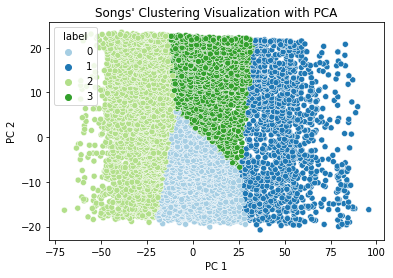

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #2 dimensions
pca_fit = pca.fit_transform(X)

#DF created with results to display in 2D
pca_df = pd.DataFrame(pca_fit, columns=['PC 1', 'PC 2']) 
pca_df['label'] = y

sns.scatterplot(data=pca_df, x='PC 1', y='PC 2', hue='label', palette='Paired')
plt.title("Songs' Clustering Visualization with PCA")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


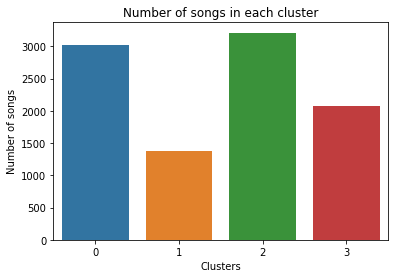

In [ ]:
sns.countplot(y)
plt.xlabel('Clusters')
plt.ylabel('Number of songs')
plt.title('Number of songs in each cluster')
plt.show()

In [ ]:
audio_df.loc[:, 'Cluster'] = y
audio_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,artist_y,1,YEAR,energy_x,loudness_x,speechiness_x,acousticness_x,instrumentalness_x,liveness_x,valence_x,tempo_x,danceability_y,Cluster
0,Please Don't Go,Please Don't Go,1980.0,0.615,-11.093,0.0398,0.00888,0.000002,0.0431,0.437,96.307,0.482,2
1,Escape (The Pina Colada Song),Escape (The Pina Colada Song),1980.0,0.509,-13.668,0.0548,0.46700,0.000004,0.0436,0.949,138.714,0.836,0
2,Rock With You,Rock With You,1980.0,0.535,-12.521,0.0353,0.17900,0.000099,0.1580,0.848,114.031,0.808,0
3,Send One Your Love,Send One Your Love,1980.0,0.358,-17.456,0.0814,0.71500,0.000013,0.0862,0.418,72.841,0.624,2
4,Do That To Me One More Time,Do That To Me One More Time,1980.0,0.524,-8.227,0.0255,0.56300,0.000131,0.0913,0.510,90.262,0.728,2


In [ ]:
# creating 4 new df's by decade
decade_1 = audio_df[audio_df['YEAR'] <=1990]
decade_2 = audio_df[(audio_df['YEAR'] >= 1991) & (audio_df['YEAR'] <=2000)]
decade_3 = audio_df[(audio_df['YEAR'] >= 2001) & (audio_df['YEAR'] <=2010)]
decade_4 = audio_df[(audio_df['YEAR'] >= 2011) & (audio_df['YEAR'] <=2020)]

In [ ]:
decade_1.head()

,artist_y,1,YEAR,energy_x,loudness_x,speechiness_x,acousticness_x,instrumentalness_x,liveness_x,valence_x,tempo_x,danceability_y,Cluster
0,Please Don't Go,Please Don't Go,1980.0,0.615,-11.093,0.0398,0.00888,0.000002,0.0431,0.437,96.307,0.482,2
1,Escape (The Pina Colada Song),Escape (The Pina Colada Song),1980.0,0.509,-13.668,0.0548,0.46700,0.000004,0.0436,0.949,138.714,0.836,0
2,Rock With You,Rock With You,1980.0,0.535,-12.521,0.0353,0.17900,0.000099,0.1580,0.848,114.031,0.808,0
3,Send One Your Love,Send One Your Love,1980.0,0.358,-17.456,0.0814,0.71500,0.000013,0.0862,0.418,72.841,0.624,2
4,Do That To Me One More Time,Do That To Me One More Time,1980.0,0.524,-8.227,0.0255,0.56300,0.000131,0.0913,0.510,90.262,0.728,2


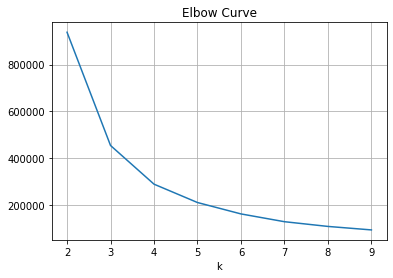

In [ ]:
#Elbow method to choose 'k' for the first decade
X = decade_1.iloc[:, [3,4,5,6,7,8,9,10,11]].values
sse = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    sse.append(model.inertia_)

plt.plot(range(2,10), sse)
plt.grid(True)
plt.xlabel('k')
plt.title('Elbow Curve')
plt.show()

In [ ]:
#Training data for first decade
X = decade_1.iloc[:, [3,4,5,6,7,8,9,10,11]].values
model = KMeans(n_clusters=4)
model.fit(X)

y = model.predict(X) #Each song goes to the cluster which has the most similarities in their features
y

array([3, 1, 0, ..., 1, 0, 3], dtype=int32)

In [ ]:
centers = model.cluster_centers_
centers

array([[ 6.90772710e-01, -9.58138359e+00,  4.70314885e-02,
         1.64881527e-01,  3.43137015e-02,  1.83056997e-01,
         7.10953944e-01,  1.16704520e+02,  6.83704835e-01],
       [ 6.74129472e-01, -9.46768463e+00,  4.52717890e-02,
         1.92411295e-01,  2.23227557e-02,  1.84229243e-01,
         6.33553670e-01,  1.37266476e+02,  5.92813073e-01],
       [ 6.47278840e-01, -1.00999420e+01,  6.00320819e-02,
         2.04172265e-01,  1.77473756e-02,  1.84951877e-01,
         6.44235495e-01,  1.75206853e+02,  4.92675768e-01],
       [ 5.71364746e-01, -1.06133786e+01,  4.87470508e-02,
         2.78397665e-01,  1.98603476e-02,  1.79213855e-01,
         5.65121811e-01,  9.07023855e+01,  6.01614540e-01]])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


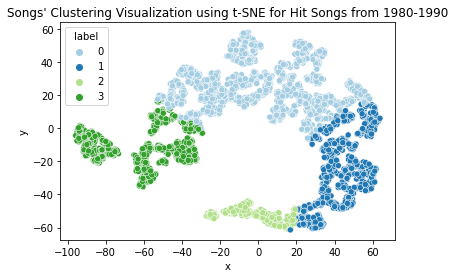

In [ ]:
tsne = TSNE()
tsne_fit = tsne.fit_transform(X)

tsne_df = pd.DataFrame(tsne_fit, columns=['x', 'y'])
tsne_df['label'] = y

sns.scatterplot(data=tsne_df, x='x', y='y', hue='label', palette='Paired')
plt.title("Songs' Clustering Visualization using t-SNE for Hit Songs from 1980-1990")
plt.show()

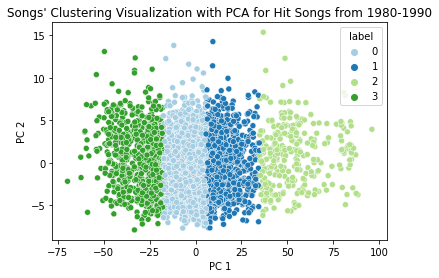

In [ ]:
pca = PCA(n_components=2) #2 dimensions
pca_fit = pca.fit_transform(X) #Fit the model with X and apply the dimensionality reduction on X

#Creating a data frame with the results from the dimensionality reduction (in order to display the data in 2d)
pca_df = pd.DataFrame(pca_fit, columns=['PC 1', 'PC 2']) 
pca_df['label'] = y

sns.scatterplot(data=pca_df, x='PC 1', y='PC 2', hue='label', palette='Paired')
plt.title("Songs' Clustering Visualization with PCA for Hit Songs from 1980-1990")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


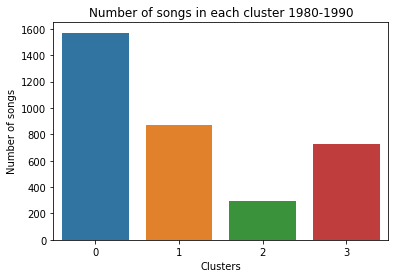

In [ ]:
sns.countplot(y)
plt.xlabel('Clusters')
plt.ylabel('Number of songs')
plt.title('Number of songs in each cluster 1980-1990')
plt.show()

# 2nd Decade

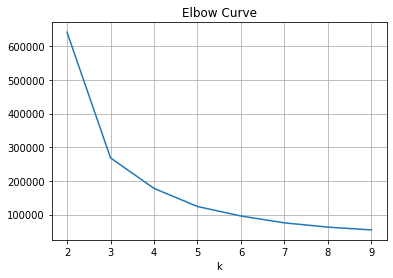

In [ ]:
#Clustering the second decade
X = decade_2.iloc[:, [3,4,5,6,7,8,9,10,11]].values
sse = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    sse.append(model.inertia_)

plt.plot(range(2,10), sse)
plt.grid(True)
plt.xlabel('k')
plt.title('Elbow Curve')
plt.show()

In [ ]:
#Training data for second decade
X = decade_2.iloc[:, [3,4,5,6,7,8,9,10,11]].values
model = KMeans(n_clusters=4)
model.fit(X)

y = model.predict(X) #Each song goes to the cluster which has the most similarities in their features
y

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


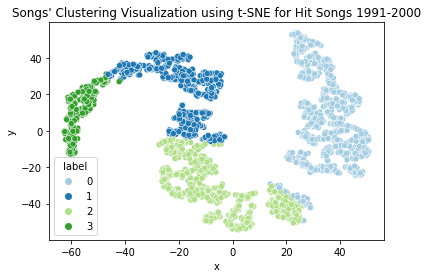

In [ ]:
tsne = TSNE()
tsne_fit = tsne.fit_transform(X)

tsne_df = pd.DataFrame(tsne_fit, columns=['x', 'y'])
tsne_df['label'] = y

sns.scatterplot(data=tsne_df, x='x', y='y', hue='label', palette='Paired')
plt.title("Songs' Clustering Visualization using t-SNE for Hit Songs 1991-2000")
plt.show()

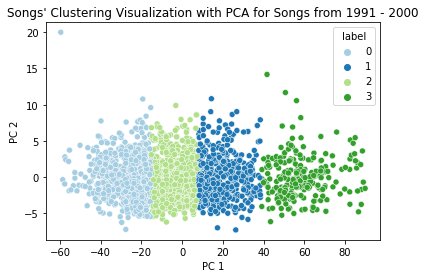

In [ ]:
pca = PCA(n_components=2) #2 dimensions
pca_fit = pca.fit_transform(X) #Fit the model with X and apply the dimensionality reduction on X

#Creating a data frame with the results from the dimensionality reduction (in order to display the data in 2d)
pca_df = pd.DataFrame(pca_fit, columns=['PC 1', 'PC 2']) 
pca_df['label'] = y

sns.scatterplot(data=pca_df, x='PC 1', y='PC 2', hue='label', palette='Paired')
plt.title("Songs' Clustering Visualization with PCA for Songs from 1991 - 2000")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


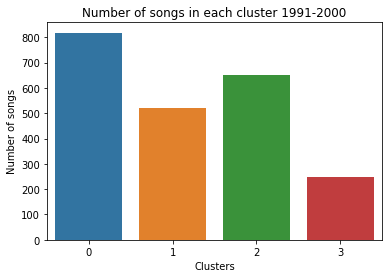

In [ ]:
sns.countplot(y)
plt.xlabel('Clusters')
plt.ylabel('Number of songs')
plt.title('Number of songs in each cluster 1991-2000')
plt.show()

# 3rd Decade

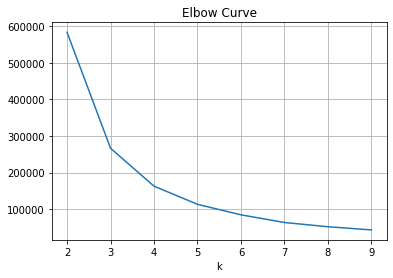

In [ ]:
#Clustering the third decade
X = decade_3.iloc[:, [3,4,5,6,7,8,9,10,11]].values
sse = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    sse.append(model.inertia_)

plt.plot(range(2,10), sse)
plt.grid(True)
plt.xlabel('k')
plt.title('Elbow Curve')
plt.show()

In [ ]:
#Training data for second decade
X = decade_3.iloc[:, [3,4,5,6,7,8,9,10,11]].values
model = KMeans(n_clusters=4)
model.fit(X)

y = model.predict(X) #Each song goes to the cluster which has the most similarities in their features
y

array([3, 3, 1, ..., 2, 3, 3], dtype=int32)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


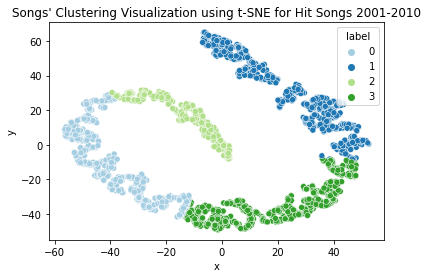

In [ ]:
tsne = TSNE()
tsne_fit = tsne.fit_transform(X)

tsne_df = pd.DataFrame(tsne_fit, columns=['x', 'y'])
tsne_df['label'] = y

sns.scatterplot(data=tsne_df, x='x', y='y', hue='label', palette='Paired')
plt.title("Songs' Clustering Visualization using t-SNE for Hit Songs 2001-2010")
plt.show()

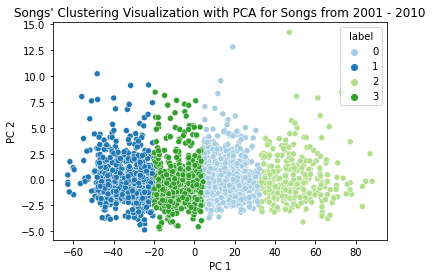

In [ ]:
pca = PCA(n_components=2) #2 dimensions
pca_fit = pca.fit_transform(X) #Fit the model with X and apply the dimensionality reduction on X

#Creating a data frame with the results from the dimensionality reduction (in order to display the data in 2d)
pca_df = pd.DataFrame(pca_fit, columns=['PC 1', 'PC 2']) 
pca_df['label'] = y

sns.scatterplot(data=pca_df, x='PC 1', y='PC 2', hue='label', palette='Paired')
plt.title("Songs' Clustering Visualization with PCA for Songs from 2001 - 2010")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


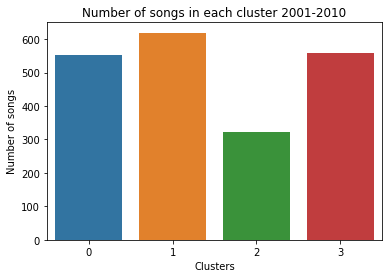

In [ ]:
sns.countplot(y)
plt.xlabel('Clusters')
plt.ylabel('Number of songs')
plt.title('Number of songs in each cluster 2001-2010')
plt.show()

# 4th Question

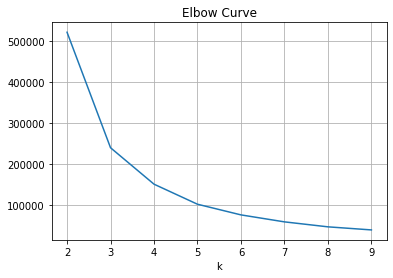

In [ ]:
#Clustering the third decade
X = decade_4.iloc[:, [3,4,5,6,7,8,9,10,11]].values
sse = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    sse.append(model.inertia_)

plt.plot(range(2,10), sse)
plt.grid(True)
plt.xlabel('k')
plt.title('Elbow Curve')
plt.show()

In [ ]:
#Training data for second decade
X = decade_4.iloc[:, [3,4,5,6,7,8,9,10,11]].values
model = KMeans(n_clusters=4)
model.fit(X)

y = model.predict(X) #Each song goes to the cluster which has the most similarities in their features
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


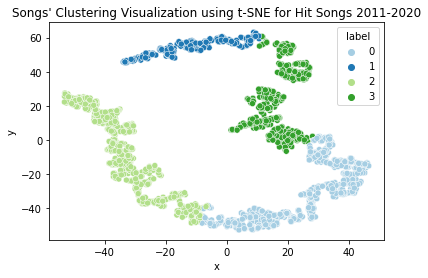

In [ ]:
tsne = TSNE()
tsne_fit = tsne.fit_transform(X)

tsne_df = pd.DataFrame(tsne_fit, columns=['x', 'y'])
tsne_df['label'] = y

sns.scatterplot(data=tsne_df, x='x', y='y', hue='label', palette='Paired')
plt.title("Songs' Clustering Visualization using t-SNE for Hit Songs 2011-2020")
plt.show()

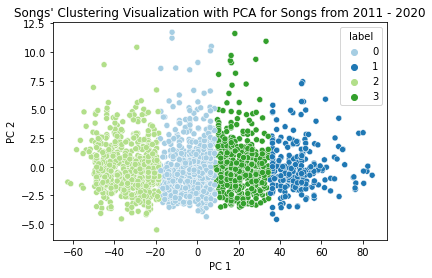

In [ ]:
pca = PCA(n_components=2) #2 dimensions
pca_fit = pca.fit_transform(X) #Fit the model with X and apply the dimensionality reduction on X

#Creating a data frame with the results from the dimensionality reduction (in order to display the data in 2d)
pca_df = pd.DataFrame(pca_fit, columns=['PC 1', 'PC 2']) 
pca_df['label'] = y

sns.scatterplot(data=pca_df, x='PC 1', y='PC 2', hue='label', palette='Paired')
plt.title("Songs' Clustering Visualization with PCA for Songs from 2011 - 2020")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


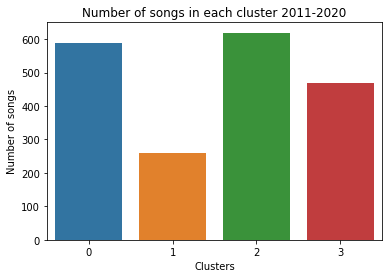

In [ ]:
sns.countplot(y)
plt.xlabel('Clusters')
plt.ylabel('Number of songs')
plt.title('Number of songs in each cluster 2011-2020')
plt.show()

In [ ]:
decade_4.head()

,artist_y,1,YEAR,energy_x,loudness_x,speechiness_x,acousticness_x,instrumentalness_x,liveness_x,valence_x,tempo_x,danceability_y,Cluster
7757,Born To Be Somebody,Born To Be Somebody,2011.0,0.619,-5.239,0.0295,0.1870,0.000000,0.0493,0.296,117.927,0.674,3
7758,Roll Up,Roll Up,2011.0,0.805,-5.473,0.1920,0.0524,0.000000,0.0914,0.602,125.358,0.523,3
7759,I Won't Let Go,I Won't Let Go,2011.0,0.406,-7.083,0.0278,0.7420,0.000000,0.1130,0.222,131.960,0.557,3
7760,Heart Like Mine,Heart Like Mine,2011.0,0.844,-3.394,0.0381,0.0642,0.000001,0.1240,0.493,155.067,0.437,1
7761,Tomorrow,Tomorrow,2011.0,0.644,-5.774,0.0363,0.5600,0.000000,0.1090,0.349,141.733,0.441,3


In [ ]:
decade_4.loc[:, 'Cluster'] = y

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


The clearest partitions appeared to come from the 4th decade. Because of this, we will examine the differences within the clusters and see how well the models did partitioning the data

In [ ]:
features = ['energy_x', 'loudness_x', 'speechiness_x', 'acousticness_x', 'instrumentalness_x', 'liveness_x', 'valence_x', 'tempo_x', 'danceability_y']

['Born To Be Somebody', 'Roll Up', "I Won't Let Go", 'Firework', 'Loser Like Me', 'Raise Your Glass', 'Hell To The No', 'Friday', 'Live A Little', 'Dancing Crazy', 'Judas', 'Give Me Everything', 'Country Girl (Shake It For Me)', 'Run The World (Girls)', 'Dirt Road Anthem', 'All By Myself', 'Papi', 'Super Bass', 'The Edge Of Glory', 'Never Gonna Leave This Bed', '(It) Feels So Good', 'Pumped Up Kicks', 'Back To Black', 'Friday', 'Last Friday Night (T.G.I.F.)', 'Every Teardrop Is A Waterfall', 'I Wanna Go', 'Love Done Gone', 'The Adventures Of Rain Dance Maggie', 'Love You Like A Love Song', 'Marvins Room', 'Better With The Lights Off', 'Here For A Good Time', 'Long Hot Summer', 'Mr. Saxobeat', 'Save Me, San Francisco', 'You And I', 'In The Dark', 'Sparks Fly', 'Sail', "One More Drinkin' Song", 'Faster', 'I Got You', 'Sexy And I Know It', 'Set Fire To The Rain', 'Police Dog Blues', 'All Your Life', 'Wet The Bed', 'Good Feeling', "I Don't Want This Night To End", 'Criminal', 'Drink In My 

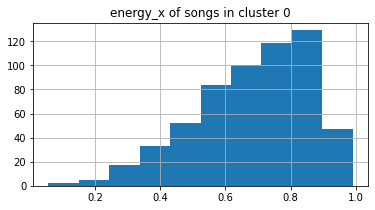

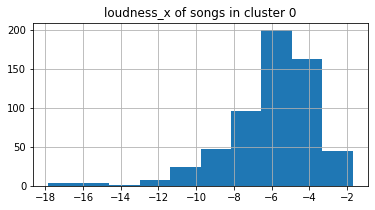

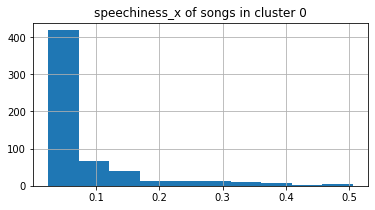

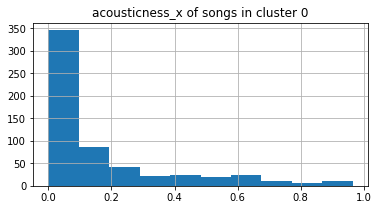

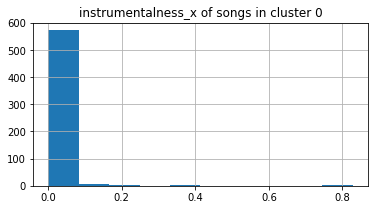

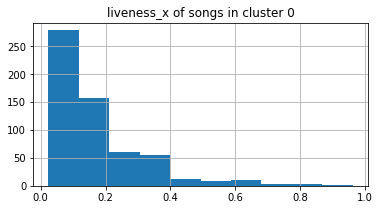

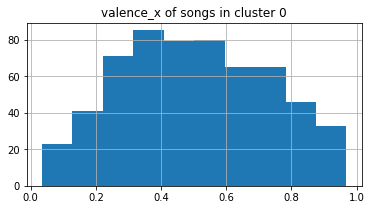

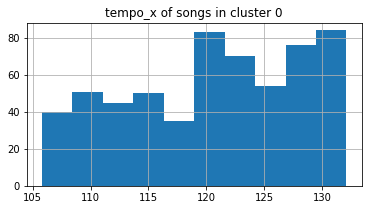

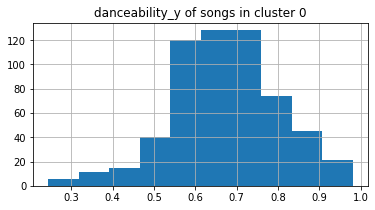

In [ ]:
cluster_0 = []
cluster_1 = []
cluster_2 = []
cluster_3 = []
#Adding the song names to a list representing each cluster
for k,v in enumerate(decade_4['1']):
    if y[k] == 0:
        cluster_0.append(v)
    elif y[k] == 1:
        cluster_1.append(v)
    elif y[k] == 2:
        cluster_2.append(v)
    else:
        cluster_3.append(v)
        
        
print(cluster_0) #cluster 0
#looping through each of the audio features and plotting a histogram for each of them
for feature in features:
    plt.subplot(decade_4.loc[:,feature][decade_4['Cluster'] == 0].hist(figsize=(6,3)))
    plt.title("%s of songs in cluster 0" % feature)
    plt.show()
    
mean_cluster0 = decade_4.loc[:,features][decade_4['Cluster'] == 0].mean()


['The Lazy Song', 'You Lie', 'Candles', 'Without You', 'Honey Bee', 'Boyfriend', 'No Sleep', 'Somebody', 'Am I The Only One', 'Barefoot Blue Jean Night', 'California King Bed', 'Somewhere Else', 'Take A Back Road', 'See No More', 'Made In America', 'Monster', 'Fish', 'Mistletoe', 'When We Stand Together', 'Countdown', 'Red Solo Cup', 'Ours', 'Lonely Boy', 'Storm Warning', 'Good Good Night', 'You Gonna Fly', 'A Woman Like You', 'Reality', 'Amen', 'Runaway Baby', "Somethin' 'Bout A Truck", 'Even If It Breaks Your Heart', 'Got My Country On', 'Come Over', 'Wanted', 'Why Ya Wanna', 'Wide Awake', 'For You', 'Take A Little Ride', 'We Are Never Ever Getting Back Together', 'Adorn', 'Wanted You More', 'Oh Love', 'Madness', 'Southern Comfort Zone', 'Crying On A Suitcase', 'Battle Scars', 'Downtown', 'Pirate Flag', 'Love And War', 'Heart Attack', '1994', "Here's To Never Growing Up", 'Lego House', "Runnin' Outta Moonlight", 'Little Bit Of Everything', 'All Over The Road', 'We Own It (Fast & Furi

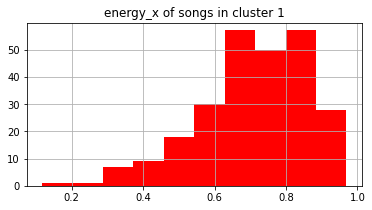

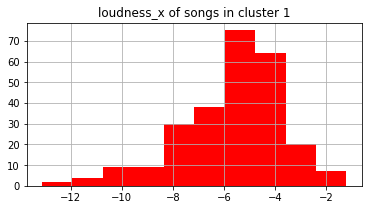

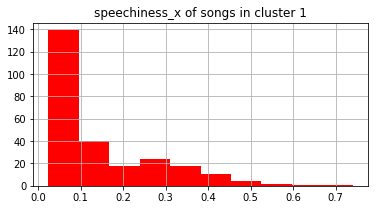

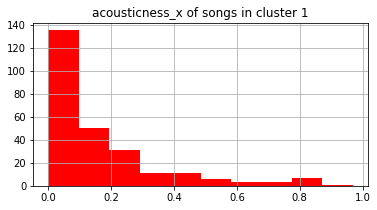

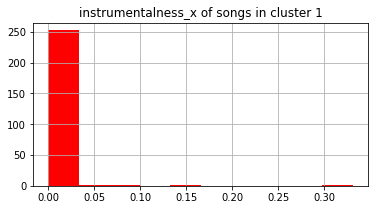

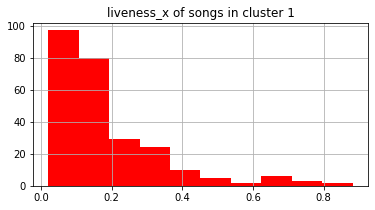

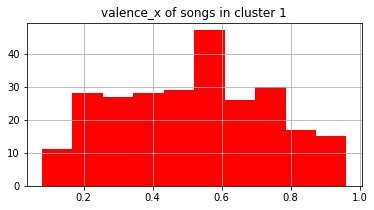

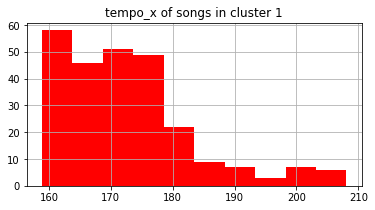

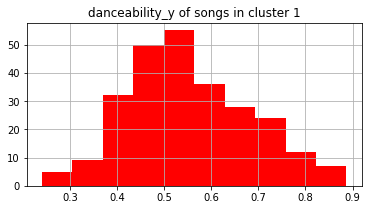

In [ ]:
print(cluster_1) #cluster 1
#looping through each of the audio features and plotting a histogram for each of them
for feature in features:
    plt.subplot(decade_4.loc[:,feature][decade_4['Cluster'] == 1].hist(figsize=(6,3), color = 'red'))
    plt.title("%s of songs in cluster 1" % feature)
    plt.show()
    
mean_cluster1 = decade_4.loc[:,features][decade_4['Cluster'] == 1].mean()

["Just Can't Get Enough", 'Bleed Red', 'Get It Right', 'Who Says', 'Blackbird', 'Misery', 'Sure Thing', 'Bring It Back', "If Heaven Wasn't So Far Away", 'Tonight Tonight', 'Country Song', "She Ain't You", 'Good Life', 'Right There', 'Look It Up', 'Best Thing I Never Had', 'I Love You This Big', 'Jolene', 'Keep Your Head Up', "Just Fishin'", 'Skyscraper', 'Country Must Be Country Wide', 'Outlaw', 'Novacane', 'Quickie', 'Cheers (Drink To That)', 'We Owned The Night', 'It Girl', 'Baggage Claim', 'Gucci Gucci', 'Brighter Than The Sun', 'Mr. Know It All', 'Work Out', 'Body And Soul', 'Love On Top', "You Don't Know Her Like I Do", 'Tattoos On This Town', 'Keep Me In Mind', 'Rack City', 'Donald Trump', 'Stupid Hoe', 'Party On Fifth Ave.', 'Wobble', 'We Are Young', 'Where I Come From', 'Banjo', 'Drink On It', "When I'm Gone", 'Stereo Hearts', 'So Good', 'Springsteen', 'Fly Over States', 'Midnight City', 'Bully', 'Boyfriend', 'Little Talks', 'Fine By Me', 'Whistle', 'Cowboys And Angels', 'One M

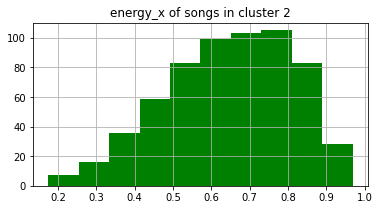

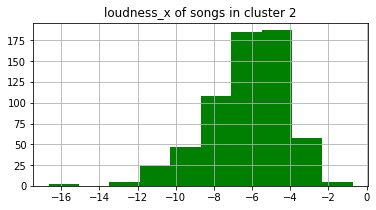

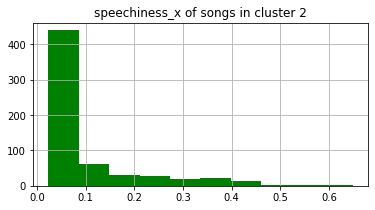

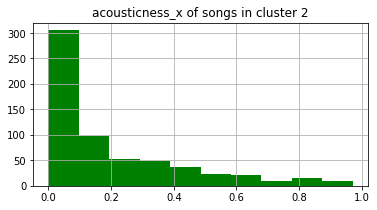

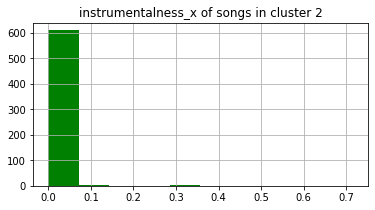

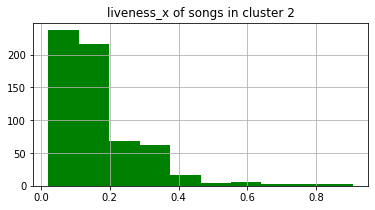

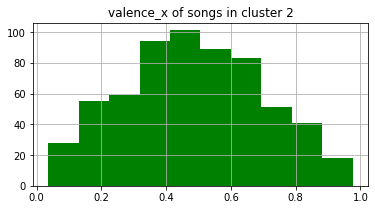

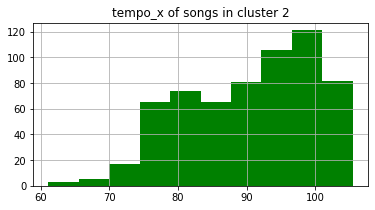

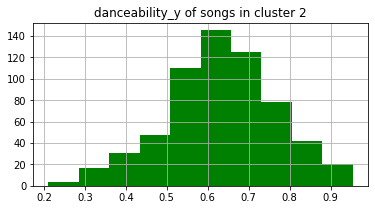

In [ ]:
print(cluster_2) #cluster 2
#looping through each of the audio features and plotting a histogram for each of them
for feature in features:
    plt.subplot(decade_4.loc[:,feature][decade_4['Cluster'] == 2].hist(figsize=(6,3), color = 'green'))
    plt.title("%s of songs in cluster 2" % feature)
    plt.show()
    
mean_cluster1 = decade_4.loc[:,features][decade_4['Cluster'] == 2].mean()

['Heart Like Mine', 'Tomorrow', 'I Do', "Did It On'em", 'Arms', "I Can't Love You Back", 'I Smile', 'Rope', 'Turning Tables', 'Homeboy', 'Hustle Hard', 'Family Man', 'Hair', 'Just A Kiss', 'The Story Of Us', 'How To Love', 'Heartless', 'Man Down', 'Angel', 'Today Is Your Day', 'Up All Night', 'God Gave Me You', 'Someone Like You', 'Walk', 'Headlines', 'Frick Park Market', 'Nothing', 'Who Gon Stop Me', 'Ni**as in Paris', 'Not Over You', 'Paradise', "Love Don't Run", 'Blunt Blowin', "I Got Nothin'", "Cost Of Livin'", 'It Will Rain', 'The One That Got Away', 'A Thousand Years', 'Heartbeat', 'Crawling Back To You', 'Without You', "I Won't Give Up", 'Gotta Have It', "Dancin' Away With My Heart", 'Sorry For Party Rocking', 'Over You', 'Better Than I Used To Be', 'I Will Always Love You', 'Drank In My Cup', 'Eyes Open', 'Climax', 'Drunk On You', 'Everybody Talks', 'No Hurry', 'Mercy', 'Loud', 'Sweet Love', 'Beers Ago', 'Eyes Wide Open', 'Heart Attack', 'Same Damn Time', 'Work Hard, Play Hard'

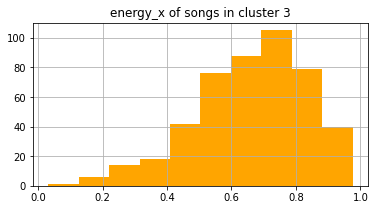

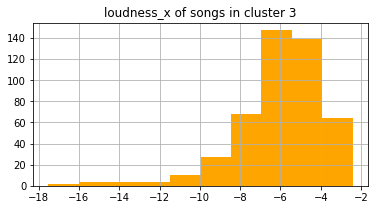

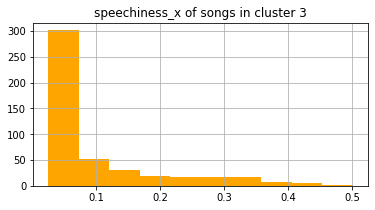

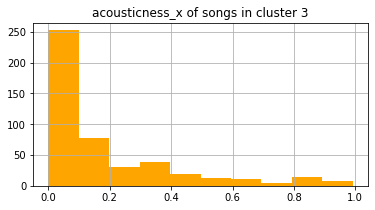

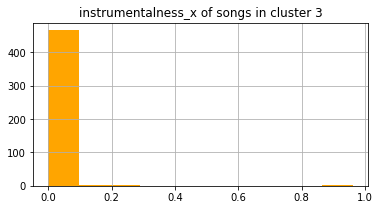

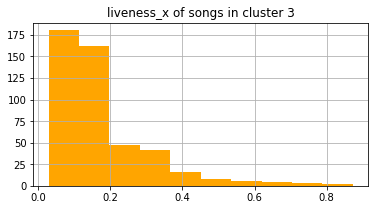

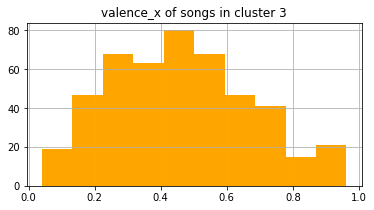

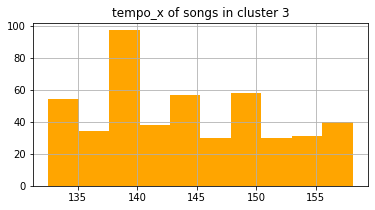

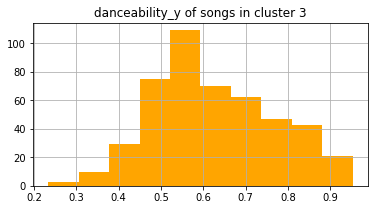

In [ ]:
print(cluster_3) #cluster 3
#looping through each of the audio features and plotting a histogram for each of them
for feature in features:
    plt.subplot(decade_4.loc[:,feature][decade_4['Cluster'] == 3].hist(figsize=(6,3), color = 'orange'))
    plt.title("%s of songs in cluster 3" % feature)
    plt.show()
    
mean_cluster1 = decade_4.loc[:,features][decade_4['Cluster'] == 3].mean()

# Radar Chart

Tutorial followed from - https://www.python-graph-gallery.com/web-radar-chart-with-matplotlib

In [ ]:
#selecting the audio features wanted for the radar chart
audio_features_radar = ['YEAR', 'energy_x', 'loudness_x', 'speechiness_x', 'acousticness_x', 'instrumentalness_x', 'liveness_x', 'valence_x', 'tempo_x', 'danceability_y']
audio_df_radar = df[audio_features_radar]

In [ ]:
audio_df_radar.head()

,YEAR,energy_x,loudness_x,speechiness_x,acousticness_x,instrumentalness_x,liveness_x,valence_x,tempo_x,danceability_y
0,1980.0,0.615,-11.093,0.0398,0.00888,0.000002,0.0431,0.437,96.307,0.482
1,1980.0,0.509,-13.668,0.0548,0.46700,0.000004,0.0436,0.949,138.714,0.836
2,1980.0,0.535,-12.521,0.0353,0.17900,0.000099,0.1580,0.848,114.031,0.808
3,1980.0,0.358,-17.456,0.0814,0.71500,0.000013,0.0862,0.418,72.841,0.624
4,1980.0,0.524,-8.227,0.0255,0.56300,0.000131,0.0913,0.510,90.262,0.728


In [ ]:
#selecting the beginning of the data (1980), the middle of the data (2000), and the end of the data (2020)
radar_df = audio_df_radar[(audio_df_radar['YEAR'] == 1980.0) | (audio_df_radar['YEAR'] == 2000) | (audio_df_radar['YEAR'] ==2020)]

In [ ]:
radar_df.head()

,YEAR,energy_x,loudness_x,speechiness_x,acousticness_x,instrumentalness_x,liveness_x,valence_x,tempo_x,danceability_y
0,1980.0,0.615,-11.093,0.0398,0.00888,0.000002,0.0431,0.437,96.307,0.482
1,1980.0,0.509,-13.668,0.0548,0.46700,0.000004,0.0436,0.949,138.714,0.836
2,1980.0,0.535,-12.521,0.0353,0.17900,0.000099,0.1580,0.848,114.031,0.808
3,1980.0,0.358,-17.456,0.0814,0.71500,0.000013,0.0862,0.418,72.841,0.624
4,1980.0,0.524,-8.227,0.0255,0.56300,0.000131,0.0913,0.510,90.262,0.728


In [ ]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
radar_df[['energy_x', 'loudness_x', 'speechiness_x', 'acousticness_x', 'instrumentalness_x', 'liveness_x', 'valence_x', 'tempo_x', 'danceability_y']] = mms.fit_transform(radar_df[['energy_x', 'loudness_x', 'speechiness_x', 'acousticness_x', 'instrumentalness_x', 'liveness_x', 'valence_x', 'tempo_x', 'danceability_y']])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
radar_df

,YEAR,energy_x,loudness_x,speechiness_x,acousticness_x,instrumentalness_x,liveness_x,valence_x,tempo_x,danceability_y
0,1980.0,0.606193,0.571501,0.033552,0.008916,0.000002,0.021393,0.422813,0.286501,0.366887
1,1980.0,0.496052,0.463421,0.062476,0.476454,0.000005,0.021910,0.963068,0.558433,0.835762
2,1980.0,0.523067,0.511563,0.024875,0.182533,0.000113,0.140141,0.856495,0.400155,0.798675
3,1980.0,0.339152,0.304428,0.113768,0.729552,0.000014,0.065936,0.402765,0.136027,0.554967
4,1980.0,0.511638,0.691794,0.005978,0.574427,0.000149,0.071207,0.499842,0.247738,0.692715
...,...,...,...,...,...,...,...,...,...,...
9686,2020.0,0.874273,0.884449,0.192056,0.049452,0.000000,0.363373,0.741479,0.338173,0.361589
9687,2020.0,0.930382,0.919748,0.051099,0.027612,0.000007,0.150475,0.952517,0.630349,0.421192
9688,2020.0,0.658146,0.806842,0.030659,0.306020,0.000000,0.103969,0.591643,0.368010,0.675497
9689,2020.0,0.460723,0.683694,0.581566,0.009895,0.000000,0.149442,0.380606,0.515303,0.891391


In [ ]:
#getting the average of each of the scaled audio features and assigning to a new variable
hs_radar = (
    radar_df.groupby('YEAR').agg(
        avg_energy = ("energy_x", np.mean),
        avg_loudness = ("loudness_x", np.mean),
        avg_acousticness = ("acousticness_x", np.mean),
        avg_instrumentalness = ("instrumentalness_x", np.mean),
        avg_liveness = ("liveness_x", np.mean),
        avg_valence = ("valence_x", np.mean),
        avg_tempo = ("tempo_x", np.mean),
        avg_danceability = ("danceability_y", np.mean)

    )
    .reset_index()
)

In [ ]:
hs_radar

,YEAR,avg_energy,avg_loudness,avg_acousticness,avg_instrumentalness,avg_liveness,avg_valence,avg_tempo,avg_danceability
0,1980.0,0.585472,0.610092,0.284768,0.027762,0.170337,0.652018,0.452401,0.534027
1,2000.0,0.675611,0.768636,0.161720,0.007726,0.145430,0.548986,0.421231,0.590420
2,2020.0,0.610987,0.756323,0.214367,0.005824,0.150195,0.452249,0.464173,0.614617


In [ ]:
#colours for the graph
BG_WHITE = "#fbf9f4"
BLUE = "#2a475e"
GREY70 = "#b3b3b3"
GREY_LIGHT = "#f2efe8"
COLORS = ["#FF5A5F", "#FFB400", "#007A87"]

In [ ]:
# The three years
years = hs_radar["YEAR"].values.tolist()

# The audio feature variables in the plot
audio_variables = hs_radar.columns.tolist()[1:]
num_audio_var = len(audio_variables)

# Angles at which the values of the numeric variables are placed
angles = [n / num_audio_var * 2 * np.pi for n in range(num_audio_var)]
angles += angles[:1]

# Padding used to customize the location of the tick labels
x_vertical_padding = 5
x_horizontal_padding = 50    

# Angle values going from 0 to 2*pi
hangles = np.linspace(0, 2 * np.pi)

# Used for the equivalent of horizontal lines in cartesian coordinates plots 
# The last one is also used to add a fill which acts a background color.
h0 = np.zeros(len(hangles))
h1 = np.ones(len(hangles)) * 0.5
h2 = np.ones(len(hangles))

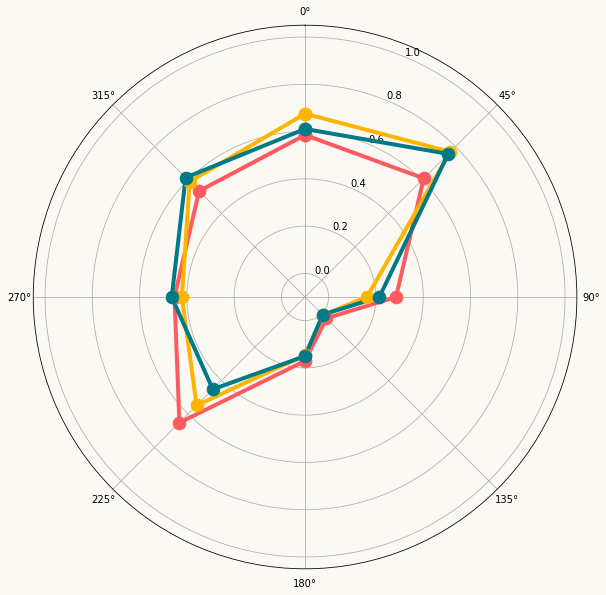

In [ ]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, polar=True)
# setting colours
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

# Rotate the "" 0 degrees on top. 
# There is where the first variable, avg_energy, will go.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Setting lower limit to negative value reduces overlap
# for values that are 0 (the minimums)
ax.set_ylim(-0.1, 1.05)

# Plot lines and dots
for idx, year in enumerate(years):
    values = hs_radar.iloc[idx].drop("YEAR").values.tolist()
    values += values[:1]
    ax.plot(angles, values, c=COLORS[idx], linewidth=4, label=year)
    ax.scatter(angles, values, s=160, c=COLORS[idx], zorder=10)

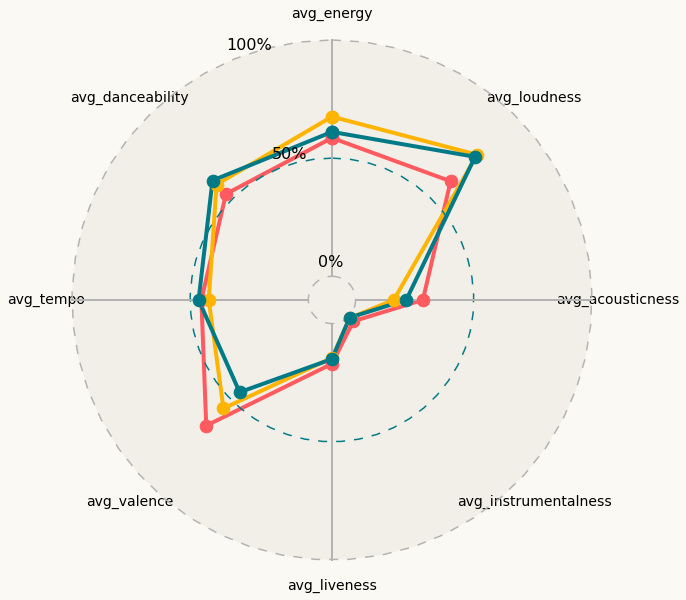

In [ ]:
# Set values for the angular axis (x)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(audio_variables, size=14)

# Remove lines for radial axis (y)
ax.set_yticks([])
ax.yaxis.grid(False)
ax.xaxis.grid(False)

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

# Add custom lines for radial axis (y) at 0, 0.5 and 1.
ax.plot(hangles, h0, ls=(0, (6, 6)), c=GREY70)
ax.plot(hangles, h1, ls=(0, (6, 6)), c=COLORS[2])
ax.plot(hangles, h2, ls=(0, (6, 6)), c=GREY70)

# Now fill the area of the circle with radius 1.
# This create the effect of gray background.
ax.fill(hangles, h2, GREY_LIGHT)

# Custom guides for angular axis (x).
# These four lines do not cross the y = 0 value, so they go from 
# the innermost circle, to the outermost circle with radius 1.
ax.plot([0, 0], [0, 1], lw=2, c=GREY70)
ax.plot([np.pi, np.pi], [0, 1], lw=2, c=GREY70)
ax.plot([np.pi / 2, np.pi / 2], [0, 1], lw=2, c=GREY70)
ax.plot([-np.pi / 2, -np.pi / 2], [0, 1], lw=2, c=GREY70)

# Add levels
# These labels indicate the values of the radial axis
PAD = 0.05
ax.text(-0.4, 0 + PAD, "0%", size=16, fontname="Roboto")
ax.text(-0.4, 0.5 + PAD, "50%", size=16, fontname="Roboto")
ax.text(-0.4, 1 + PAD, "100%", size=16, fontname="Roboto")


fig

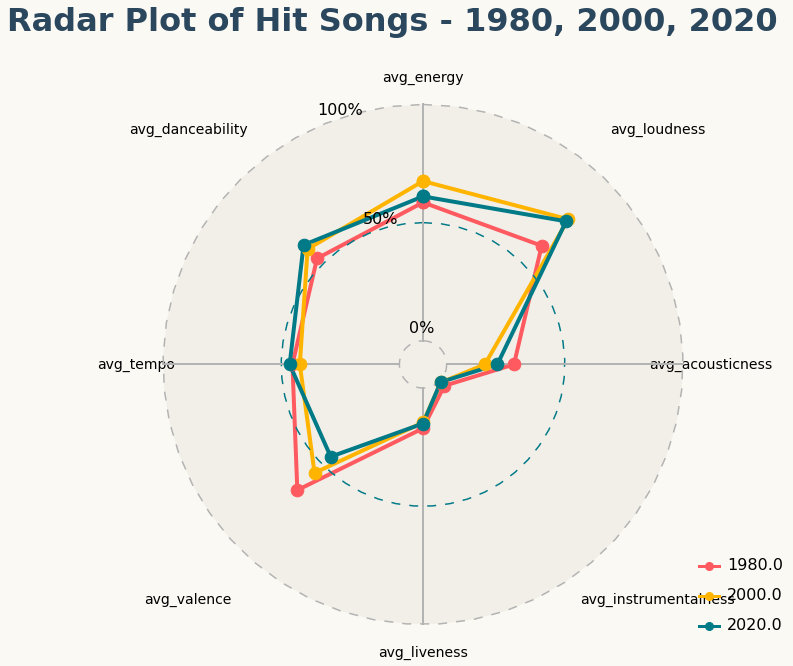

In [ ]:
# Create and add legends
# Legends are made from scratch.

# Iterate through audio features, years and colors.
# These handles contain both markers and lines.
from matplotlib.lines import Line2D

handles = [
    Line2D(
        [], [], 
        c=color, 
        lw=3, 
        marker="o", 
        markersize=8, 
        label=year
    )
    for year, color in zip(years, COLORS)
]

legend = ax.legend(
    handles=handles,
    loc=(1, 0),       # bottom-right
    labelspacing=1.5, # add space between labels
    frameon=False     # don't put a frame
)

# Iterate through text elements and change their properties
for text in legend.get_texts():
    text.set_fontname("Roboto") # Change default font 
    text.set_fontsize(16)       # Change default font size

# Adjust tick label positions
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS[0::2]:
    tick.set_pad(x_vertical_padding)
    
for tick in XTICKS[1::2]:
    tick.set_pad(x_horizontal_padding)

# Add title
fig.suptitle(
    "Radar Plot of Hit Songs - 1980, 2000, 2020",
    x = 0.1,
    y = 1,
    ha="left",
    fontsize=32,
    fontname="Lobster Two",
    color=BLUE,
    weight="bold",    
)
fig